In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split

In [ ]:
# load the dataset
fashion_dataset = FashionMNIST(root = 'data/', download=True, train = True, transform = transforms.ToTensor())
print(fashion_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


Sample shape: torch.Size([1, 28, 28]), Label: T-shirt/top
tensor([[[0.6510, 0.5961, 0.6196, 0.6196, 0.6275],
         [0.6235, 0.6000, 0.6157, 0.6196, 0.6353],
         [0.6196, 0.6078, 0.6353, 0.6196, 0.6275],
         [0.5961, 0.6275, 0.6196, 0.6314, 0.6275],
         [0.5765, 0.6431, 0.6078, 0.6471, 0.6314]]])
tensor(1.) tensor(0.)


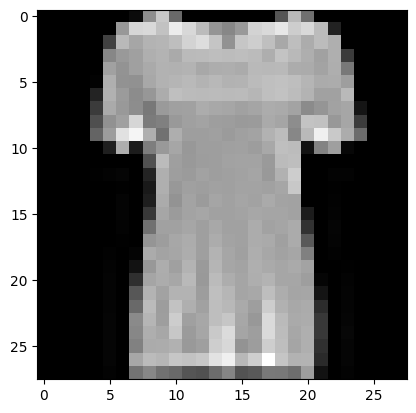

In [ ]:
sample_tensor, label = fashion_dataset[10]
print(f"Sample shape: {sample_tensor.shape}, Label: {fashion_dataset.classes[label]}")
tpil = transforms.ToPILImage()
image = tpil(sample_tensor)
image.show()
print(sample_tensor[:, 10:15, 10:15])
print(torch.max(sample_tensor), torch.min(sample_tensor))
plt.imshow(sample_tensor[0], cmap='gray')

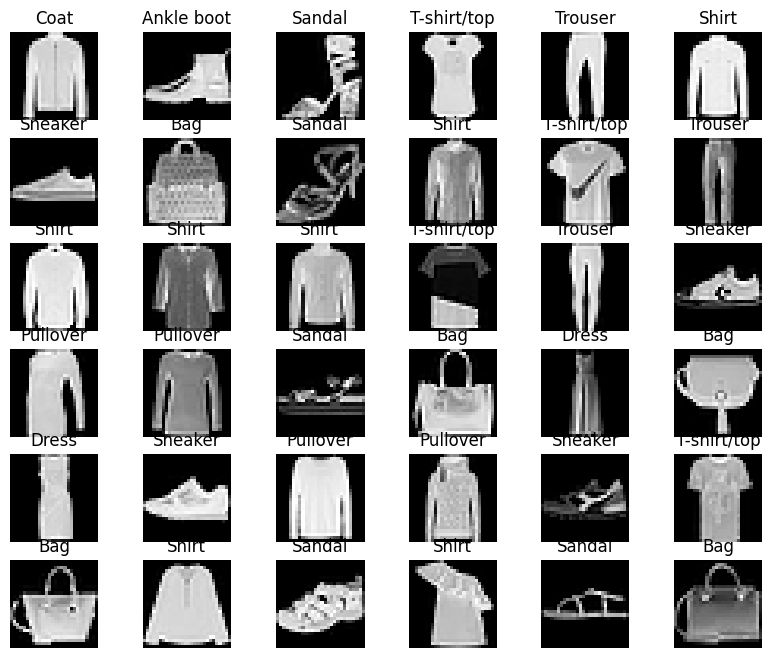

In [ ]:
# Grid of images
figure = plt.figure(figsize=(10, 8))
cols, rows = 6,6
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(fashion_dataset), size=(1,)).item()
    img, label = fashion_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(fashion_dataset.classes[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# Check for GPU
train_dataset, validation_dataset = random_split(fashion_dataset, [50000, 10000])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("length of Train Datasets: ", len(train_dataset))
print("length of Validation Datasets: ", len(validation_dataset))

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=128, shuffle=False)
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [ ]:
## Basic set up for a logistic regression model (won't be used in practice or for training)
input_size = 28 * 28
num_classes = 10

# we gradually build on this inherited class from pytorch
model = nn.Linear(input_size, num_classes)

In [ ]:
# Slowly build the model, now with hidden layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        xb = x.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return(out)

model = Net()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())


torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0334,  0.0253, -0.0178,  ...,  0.0168,  0.0243,  0.0333],
         [ 0.0040,  0.0066,  0.0025,  ..., -0.0332,  0.0205, -0.0305],
         [ 0.0334, -0.0014, -0.0341,  ...,  0.0036, -0.0352,  0.0198],
         ...,
         [-0.0033, -0.0320, -0.0303,  ..., -0.0220,  0.0239,  0.0338],
         [-0.0194,  0.0297, -0.0103,  ..., -0.0346,  0.0087,  0.0316],
         [ 0.0138, -0.0200,  0.0338,  ...,  0.0169, -0.0103,  0.0085]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0257,  0.0192,  0.0002, -0.0307,  0.0323,  0.0269, -0.0183,  0.0073,
          0.0234, -0.0086], requires_grad=True)]

In [ ]:
# Alway check the dimensions and sample data/image
for images, labels in train_loader:
    outputs = model(images)
    break

print('Outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
tensor([[ 0.5604,  0.1393,  0.3673,  ..., -0.0065,  0.2373,  0.3172],
        [ 0.1750,  0.2094,  0.1064,  ..., -0.1430,  0.1378,  0.2020],
        [ 0.4533,  0.2097,  0.2405,  ...,  0.1107, -0.0435,  0.4130],
        ...,
        [ 0.2607, -0.0852, -0.0167,  ..., -0.0033,  0.0668,  0.2678],
        [ 0.0679, -0.0186, -0.0814,  ..., -0.2995, -0.0055, -0.3583],
        [ 0.0165,  0.1953,  0.2942,  ...,  0.1509,  0.1128, -0.0916]],
       grad_fn=<AddmmBackward0>)
Outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[ 0.5604,  0.1393,  0.3673,  0.4538,  0.0632,  0.0430,  0.5083, -0.0065

In [ ]:
## Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

#print(preds)
#print("\n")
#print(max_probs)

Sample probabilities:
 tensor([[0.1314, 0.0863, 0.1084, 0.1181, 0.0799, 0.0783, 0.1248, 0.0746, 0.0951,
         0.1031],
        [0.1075, 0.1112, 0.1004, 0.1153, 0.0759, 0.0937, 0.1039, 0.0782, 0.1036,
         0.1104]])


In [ ]:
# accuracy calculation
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ", accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)


Accuracy:  tensor(0.0469)


Loss Function:  <function cross_entropy at 0x78ab7089cea0>


tensor(2.2953, grad_fn=<NllLossBackward0>)


In [ ]:
# We put all of the above:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)

    # We add extra methods
    def training_step(self, batch):
        # when training, we compute the cross entropy, which help us update weights
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)

    def validation_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        # in validation, we want to also look at the accuracy
        # idealy, we would like to save the model when the accuracy is the highest.
        acc = accuracy(out, labels) ## calculate metrics/accuracy
        return({'val_loss':loss, 'val_acc': acc})

    def validation_epoch_end(self, outputs):
        # at the end of epoch (after running through all the batches)
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})

    def epoch_end(self, epoch,result):
        # log epoch, loss, metrics
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

# we instantiate the model
model = Net()

# a simple helper function to evaluate
def evaluate(model, data_loader):
    # for batch in data_loader, run validation_step
    outputs = [model.validation_step(batch) for batch in data_loader]
    return(model.validation_epoch_end(outputs))

# actually training
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        ## Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward() ## backpropagation starts at the loss and goes through all layers to model inputs
            optimizer.step() ## the optimizer iterate over all parameters (tensors); use their stored grad to update their values
            optimizer.zero_grad() ## reset gradients

        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [ ]:
# test the functions, with a randomly initialized model (weights are random, e.g., untrained)
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.262540578842163, 'val_acc': 0.17474287748336792}

In [ ]:
# let's train for 10 epochs
history1 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.6817, val_acc: 0.6248
Epoch [1], val_loss: 1.4022, val_acc: 0.6557
Epoch [2], val_loss: 1.2409, val_acc: 0.6636
Epoch [3], val_loss: 1.1369, val_acc: 0.6697
Epoch [4], val_loss: 1.0638, val_acc: 0.6786
Epoch [5], val_loss: 1.0092, val_acc: 0.6852
Epoch [6], val_loss: 0.9669, val_acc: 0.6954
Epoch [7], val_loss: 0.9328, val_acc: 0.7063
Epoch [8], val_loss: 0.9046, val_acc: 0.7122
Epoch [9], val_loss: 0.8806, val_acc: 0.7236


Text(0.5, 1.0, 'Accuracy over epochs')

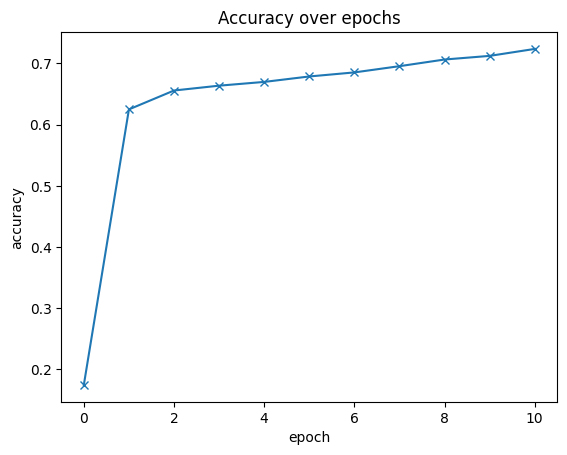

In [ ]:
# plotting accuracy
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy over epochs')

Text(0.5, 1.0, 'Losses  over epochs')

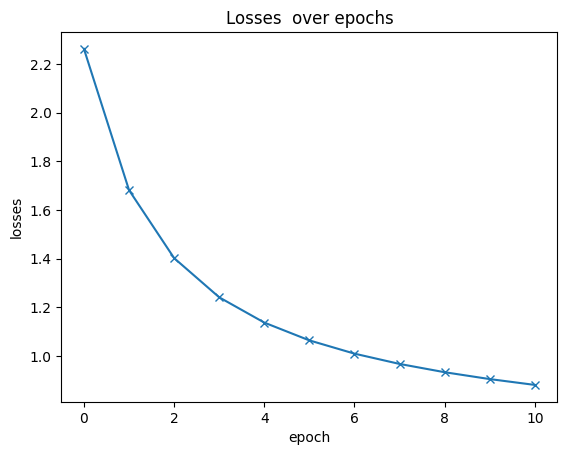

In [ ]:
# plotting losses
history = [result0] + history1
losses = [result['val_loss'] for result in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Losses  over epochs')

Length of Test Datasets:  10000
Shape:  torch.Size([1, 28, 28])
Label:  Ankle boot


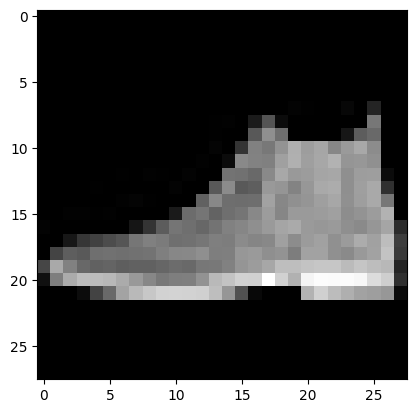

In [ ]:
# Testing with individual images
## Define the test dataset
test_data = FashionMNIST(root = 'data/', train = False, transform = transforms.ToTensor())
print("Length of Test Datasets: ", len(test_data))
img, label = test_data[0]
plt.imshow(img[0], cmap = 'gray')
print("Shape: ", img.shape)
print('Label: ', classes[label])

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

In [ ]:
img, label = test_data[0]
predicted = predict_image(img, model)

print('Label:', fashion_dataset.classes[label], ', Predicted:', fashion_dataset.classes[predicted])


Label: Ankle boot , Predicted: Ankle boot


In [ ]:
# the final check on the test dataset (not used in any training)
test_loader = DataLoader(test_data, batch_size = 256, shuffle = False)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8946313858032227, 'val_acc': 0.709179699420929}

In [ ]:
#improved CNN
class ImprovedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128*3*3, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

cnn = ImprovedCNN()
print(cnn)

ImprovedCNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=1152, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropo

In [ ]:
criterion = nn.CrossEntropyLoss()
criterion

# unlike earlier example using optim.SGD, we use optim.Adam as the optimizer
# lr(Learning Rate): Rate at which our model updates the weights in the cells each time back-propagation is done.
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)


In [ ]:
# We construct a fundamental CNN class.
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
# Training Loop
def train_model(model, epochs):
    best_acc = 0
    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation
        cnn.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = cnn(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_acc = 100 * correct / total
        scheduler.step(loss)

        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, Val Acc: {val_acc:.2f}%')

    # Test Evaluation
    cnn.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = cnn(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

train_model(cnn, epochs=20)

Epoch 1, Loss: 0.5717, Val Acc: 85.04%
Epoch 2, Loss: 0.3611, Val Acc: 88.03%
Epoch 3, Loss: 0.4404, Val Acc: 87.91%
Epoch 4, Loss: 0.4260, Val Acc: 89.29%
Epoch 5, Loss: 0.2917, Val Acc: 89.92%
Epoch 6, Loss: 0.1816, Val Acc: 87.13%
Epoch 7, Loss: 0.3277, Val Acc: 90.67%
Epoch 8, Loss: 0.3126, Val Acc: 90.43%
Epoch 9, Loss: 0.1465, Val Acc: 89.01%
Epoch 10, Loss: 0.1859, Val Acc: 90.21%
Epoch 11, Loss: 0.3253, Val Acc: 91.12%
Epoch 12, Loss: 0.2068, Val Acc: 89.34%
Epoch 13, Loss: 0.1788, Val Acc: 92.15%
Epoch 14, Loss: 0.1430, Val Acc: 92.47%
Epoch 15, Loss: 0.2076, Val Acc: 92.47%
Epoch 16, Loss: 0.1754, Val Acc: 92.21%
Epoch 17, Loss: 0.0418, Val Acc: 92.38%
Epoch 18, Loss: 0.1743, Val Acc: 92.41%
Epoch 19, Loss: 0.3863, Val Acc: 92.36%
Epoch 20, Loss: 0.0655, Val Acc: 92.34%
Test Accuracy: 92.26%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data Loading and Augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Split train into train and validation
train_size = 50000
val_size = 10000
train_data, val_data = random_split(train_dataset, [train_size, val_size])

batch_size = 64
train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Improved CNN Model
class ImprovedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128*3*3, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

model = ImprovedCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)
criterion = nn.CrossEntropyLoss()

# Modified training loop with train accuracy
def train_model(model, epochs):
    best_acc = 0
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training phase
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            running_loss += loss.item()

        # Calculate epoch statistics
        train_loss = running_loss/len(train_loader)
        train_acc = 100 * correct_train / total_train

        # Validation phase
        model.eval()
        correct_val = 0
        total_val = 0
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                val_loss += loss.item()

        val_acc = 100 * correct_val / total_val
        val_loss = val_loss/len(val_loader)
        scheduler.step(val_loss)

        # Print epoch statistics
        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}   | Val Acc: {val_acc:.2f}%')
        print('-' * 50)

    # Final test evaluation
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    print(f'Final Test Accuracy: {100 * correct_test / total_test:.2f}%')

# Start training
train_model(model, epochs=5)

Epoch 1/5:
Train Loss: 0.4776 | Train Acc: 82.64%
Val Loss: 0.3557   | Val Acc: 86.91%
--------------------------------------------------
Epoch 2/5:
Train Loss: 0.3367 | Train Acc: 87.78%
Val Loss: 0.3422   | Val Acc: 87.18%
--------------------------------------------------
Epoch 3/5:
Train Loss: 0.3010 | Train Acc: 89.02%
Val Loss: 0.3308   | Val Acc: 87.66%
--------------------------------------------------
Epoch 4/5:
Train Loss: 0.2831 | Train Acc: 89.81%
Val Loss: 0.2653   | Val Acc: 90.21%
--------------------------------------------------
Epoch 5/5:
Train Loss: 0.2715 | Train Acc: 90.07%
Val Loss: 0.2671   | Val Acc: 90.42%
--------------------------------------------------
Final Test Accuracy: 90.93%


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

# 1. Load FashionMNIST Data
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Original Dense Model
class DenseModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, xb):
        xb = xb.view(-1, 28*28)
        return self.linear(xb)

# 3. Original CNN Model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        return self.out(x)

# 4. Improved Dense Model
class DenseModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, xb):
        xb = xb.view(-1, 28*28)
        x = F.relu(self.fc1(xb))
        return self.fc2(x)

# 5. Improved CNN Model
class CNNImproved(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        return self.classifier(x)


# 6. Training and Evaluation Functions
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return accuracy

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / len(test_loader.dataset)
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# 7. Running All Models
models = [
    ("DenseModel", DenseModel()),
    ("CNN", CNN()),
    ("DenseModel2", DenseModel2()),
    ("CNNImproved", CNNImproved())
]

summary = []

for name, model in models:
    print(f"\nTraining {name}...")
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_acc = train_model(model, train_loader, criterion, optimizer, epochs=5)
    test_acc = evaluate_model(model, test_loader)
    summary.append((name, train_acc, test_acc))

# 8. Print Summary Table
print("\nSummary Table:")
print("Model\t\tTrain Acc\tTest Acc")
for name, train_acc, test_acc in summary:
    print(f"{name}\t{train_acc:.2f}%\t{test_acc:.2f}%")



Training DenseModel...
Epoch 1/5, Loss: 605.1787, Accuracy: 78.97%
Epoch 2/5, Loss: 449.4136, Accuracy: 83.84%
Epoch 3/5, Loss: 420.3986, Accuracy: 84.78%
Epoch 4/5, Loss: 404.5123, Accuracy: 85.33%
Epoch 5/5, Loss: 394.2643, Accuracy: 85.56%


TypeError: cannot unpack non-iterable float object

In [ ]:
import matplotlib.pyplot as plt

def plot_from_history(history):
    for name, metrics in history.items():
        epochs = range(1, len(metrics["accuracy"]) + 1)

        plt.figure(figsize=(12, 5))
        plt.suptitle(f"Model: {name}", fontsize=16)

        plt.subplot(1, 2, 1)
        plt.plot(epochs, metrics["loss"], marker='o')
        plt.title("Loss over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

        plt.subplot(1, 2, 2)
        plt.plot(epochs, metrics["accuracy"], marker='o', color='green')
        plt.title("Accuracy over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy (%)")

        plt.tight_layout()
        plt.show()
plot_from_history(history)

In [ ]:
def print_model_architectures(models):
    for name, model in models:
        print(f"\nModel: {name}")
        print(model)
print_model_architectures(models)



Model: DenseModel
DenseModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Model: CNN
CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

Model: DenseModel2
DenseModel2(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Model: CNNImproved
CNNImproved(
  (block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, k

In [ ]:
def train_model_with_history(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    history = []
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / len(train_loader.dataset)
        epoch_stats = {'epoch': epoch+1, 'loss': total_loss, 'accuracy': accuracy}
        history.append(epoch_stats)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return history


In [ ]:
def plot_training_history(history, model_name="Model"):
    epochs = [h['epoch'] for h in history]
    losses = [h['loss'] for h in history]
    accuracies = [h['accuracy'] for h in history]

    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, losses, 'r-o')
    plt.title(f'{model_name} - Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracies, 'b-o')
    plt.title(f'{model_name} - Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')

    plt.tight_layout()
    plt.show()


Epoch 1/5, Loss: 516.9990, Accuracy: 81.03%
Epoch 2/5, Loss: 379.2471, Accuracy: 85.91%
Epoch 3/5, Loss: 343.2362, Accuracy: 86.88%
Epoch 4/5, Loss: 318.4859, Accuracy: 87.77%
Epoch 5/5, Loss: 300.3666, Accuracy: 88.42%
Test Accuracy: 87.18%


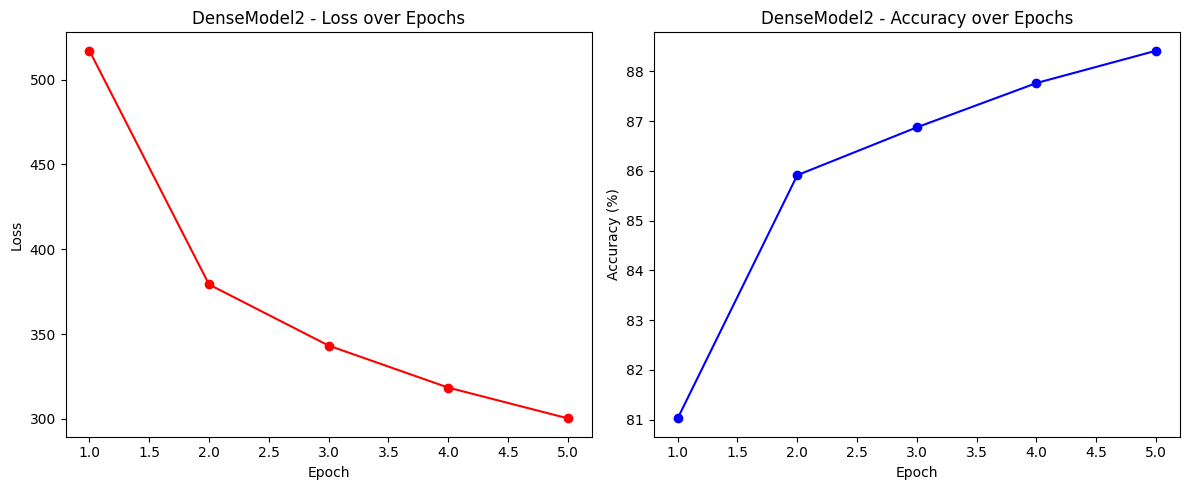

In [ ]:
model = DenseModel2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
history = train_model_with_history(model, train_loader, criterion, optimizer, epochs=5)
test_acc = evaluate_model(model, test_loader)
plot_training_history(history, model_name="DenseModel2")


Epoch 1/5, Loss: 605.4551, Accuracy: 78.77%
Epoch 2/5, Loss: 449.8165, Accuracy: 83.75%
Epoch 3/5, Loss: 421.1830, Accuracy: 84.68%
Epoch 4/5, Loss: 405.1829, Accuracy: 85.31%
Epoch 5/5, Loss: 395.2428, Accuracy: 85.60%
Test Accuracy: 84.18%


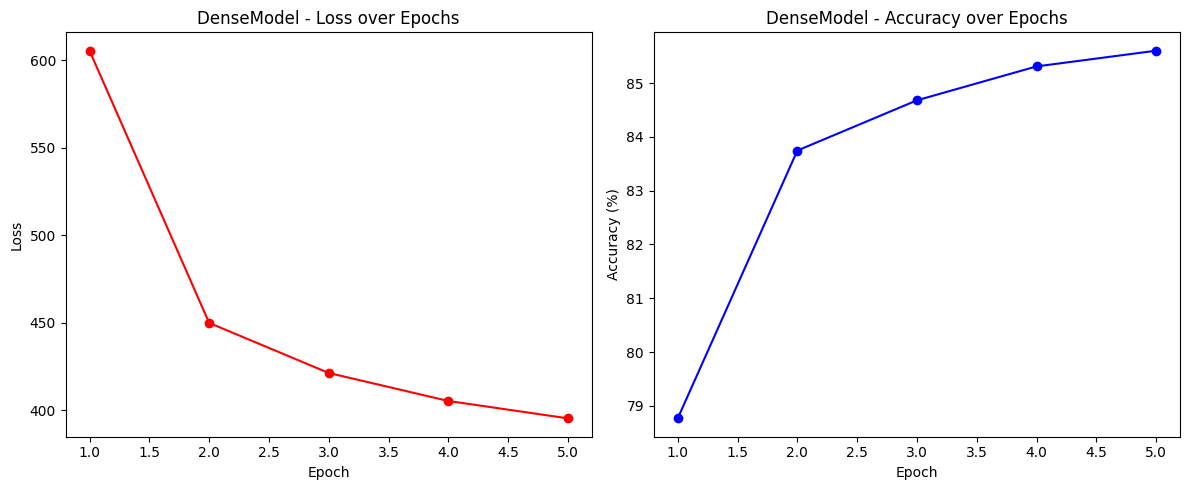

In [ ]:
model = DenseModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
history = train_model_with_history(model, train_loader, criterion, optimizer, epochs=5)
test_acc = evaluate_model(model, test_loader)
plot_training_history(history, model_name="DenseModel")

Epoch 1/5, Loss: 468.8811, Accuracy: 82.02%
Epoch 2/5, Loss: 316.7206, Accuracy: 87.99%
Epoch 3/5, Loss: 275.4107, Accuracy: 89.52%
Epoch 4/5, Loss: 252.8753, Accuracy: 90.38%
Epoch 5/5, Loss: 232.4967, Accuracy: 91.10%
Test Accuracy: 90.01%


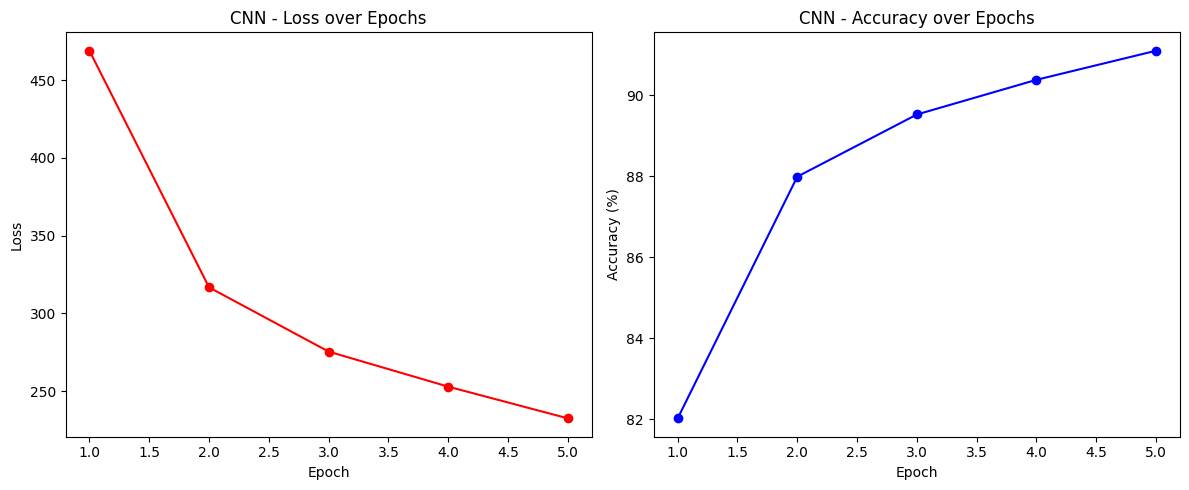

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
history = train_model_with_history(model, train_loader, criterion, optimizer, epochs=5)
test_acc = evaluate_model(model, test_loader)
plot_training_history(history, model_name="CNN")

Epoch 1/5, Loss: 381.5329, Accuracy: 85.36%
Epoch 2/5, Loss: 250.6273, Accuracy: 90.31%
Epoch 3/5, Loss: 214.3688, Accuracy: 91.75%
Epoch 4/5, Loss: 193.3859, Accuracy: 92.61%
Epoch 5/5, Loss: 173.0582, Accuracy: 93.31%
Test Accuracy: 92.91%


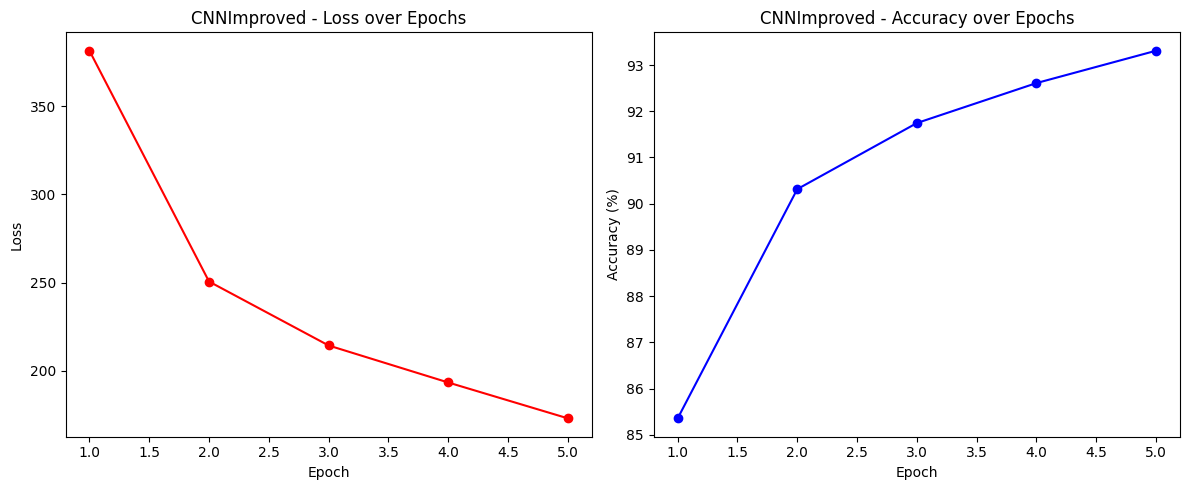

In [ ]:
model = CNNImproved()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
history = train_model_with_history(model, train_loader, criterion, optimizer, epochs=5)
test_acc = evaluate_model(model, test_loader)
plot_training_history(history, model_name="CNNImproved")